## Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.subplots as sp

## Reading & cleaning playlist attribute CSV file  

In [2]:
dfOriginal = pd.read_csv('playlist_data.csv')
# playlist link: https://open.spotify.com/playlist/5Rrf7mqN8uus2AaQQQNdc1?si=6bfa43c85b9a465f
# playlist attribute data extracted using: https://skiley.net/ 
dfOriginal.head()

,Name,Artist,Duration,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,Like a Rolling Stone,Bob Dylan,6:09,0.7310,0.482,0.721,0.000000,0.1890,-6.839,0.0321,95.263,0.557
1,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,3:42,0.0354,0.722,0.882,0.049600,0.1190,-6.763,0.0348,136.299,0.921
2,Imagine - Remastered 2010,John Lennon,3:07,0.9070,0.547,0.257,0.183000,0.0935,-12.358,0.0252,75.752,0.169
3,Purple Rain,Prince,8:40,0.0353,0.367,0.452,0.002280,0.6890,-10.422,0.0307,113.066,0.189
4,What's Going On,Marvin Gaye,3:53,0.4030,0.280,0.720,0.000001,0.3940,-9.668,0.1110,202.523,0.805


In [3]:
#Creating a dataframe only of the attributes of tracks
df = dfOriginal.drop(dfOriginal[['Name','Artist','Duration']],axis = 1,inplace=False)
df.head()


,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,0.7310,0.482,0.721,0.000000,0.1890,-6.839,0.0321,95.263,0.557
1,0.0354,0.722,0.882,0.049600,0.1190,-6.763,0.0348,136.299,0.921
2,0.9070,0.547,0.257,0.183000,0.0935,-12.358,0.0252,75.752,0.169
3,0.0353,0.367,0.452,0.002280,0.6890,-10.422,0.0307,113.066,0.189
4,0.4030,0.280,0.720,0.000001,0.3940,-9.668,0.1110,202.523,0.805


## Tempo and Loudness are the only variables whose values are not between 0 and 1

In [4]:
#Table to see min/max values of other attributes
df.drop(['Tempo','Loudness'],axis=1, inplace =False).describe().loc[['min','max']]

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Valence
min,0.000016,0.184,0.0338,0.000,0.0273,0.0239,0.0574
max,0.989000,0.947,0.9800,0.949,0.9860,0.4050,0.9870


In [5]:
#Table to see min/max values of Tempo and Loudness
df[['Tempo','Loudness']].describe().loc[['min','max']]

,Tempo,Loudness
min,63.993,-20.567
max,205.981,0.878


## Standardizing with MinMaxScaler()

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1)) 
df['Tempo_scaled']=scaler.fit_transform(df[['Tempo']])
df['Loudness_scaled']=scaler.fit_transform(df[['Loudness']])
df[['Tempo','Tempo_scaled','Loudness','Loudness_scaled']].describe().loc[['min','max']]

,Tempo,Tempo_scaled,Loudness,Loudness_scaled
min,63.993,0.0,-20.567,0.0
max,205.981,1.0,0.878,1.0


In [7]:
df.drop(['Tempo','Loudness'],axis=1,inplace=True)

In [8]:
#New table with scaled attributes
df.head()

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Speechiness,Valence,Tempo_scaled,Loudness_scaled
0,0.7310,0.482,0.721,0.000000,0.1890,0.0321,0.557,0.220230,0.640149
1,0.0354,0.722,0.882,0.049600,0.1190,0.0348,0.921,0.509240,0.643693
2,0.9070,0.547,0.257,0.183000,0.0935,0.0252,0.169,0.082817,0.382793
3,0.0353,0.367,0.452,0.002280,0.6890,0.0307,0.189,0.345614,0.473071
4,0.4030,0.280,0.720,0.000001,0.3940,0.1110,0.805,0.975646,0.508230


## Using Principal Component Analysis (PCA), decomposing 9 attributes to 2 

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)
print(df_2d[:10])

[[ 0.26116239 -0.06239589]
 [-0.47816376 -0.25318957]
 [ 0.82851014  0.13417086]
 [-0.01406056  0.67009323]
 [-0.1100883   0.07525127]
 [-0.22400149 -0.38584764]
 [ 0.0411147   0.41970305]
 [ 0.15985178  0.20583987]
 [-0.05360119 -0.31188692]
 [-0.07357361 -0.27093778]]


 ## Finding Sum of Squared Errors(SSE) and Silhoutte Scores

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse=[]
s_score=[]
#Finding SSE for number of clusters from 1-15
#Additionally, finding the silhouette score at these cluster numbers to determine their quality
for k in range(1, 15):
    km = KMeans(n_clusters=k,n_init = 'auto',random_state=42)
    if k>1:
        cluster= km.fit_predict(df_2d)
        s_score.append(silhouette_score(df_2d,cluster))
    km.fit(df_2d)
    sse.append(km.inertia_)


## Plotting SSE for Elbow Point

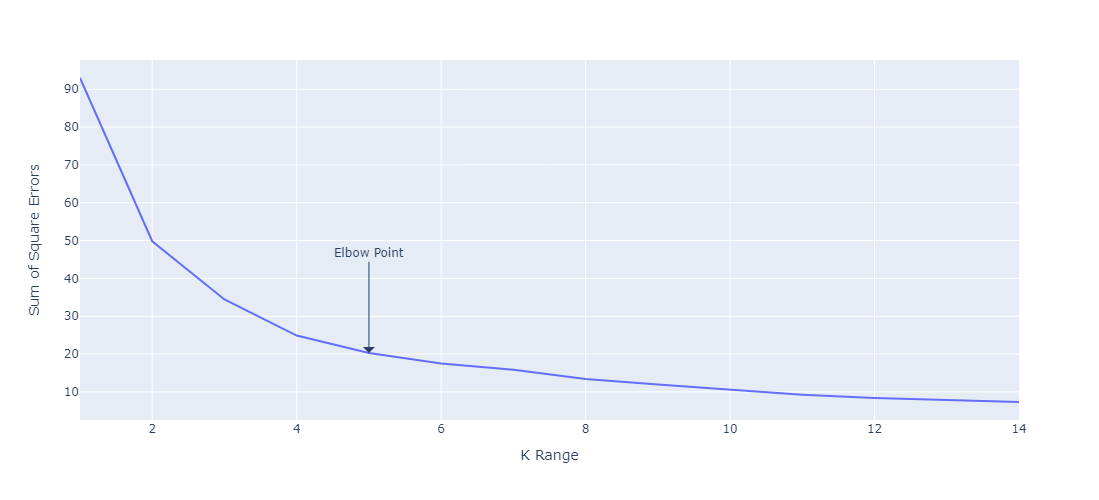

In [37]:
sse_graph=px.line(x=range(1,15),y=sse).update_layout(xaxis_title="K Range",yaxis_title="Sum of Square Errors",height=500,width=700).add_annotation(x=5,y=20.3,showarrow=True,arrowhead=1,arrowsize=2,ax=0,ay=-100,text="Elbow Point")
sse_graph.show()
                                        

 #####                     From above graph, we take no. of clusters as 5

## Plotting Silhouette Score for Verification


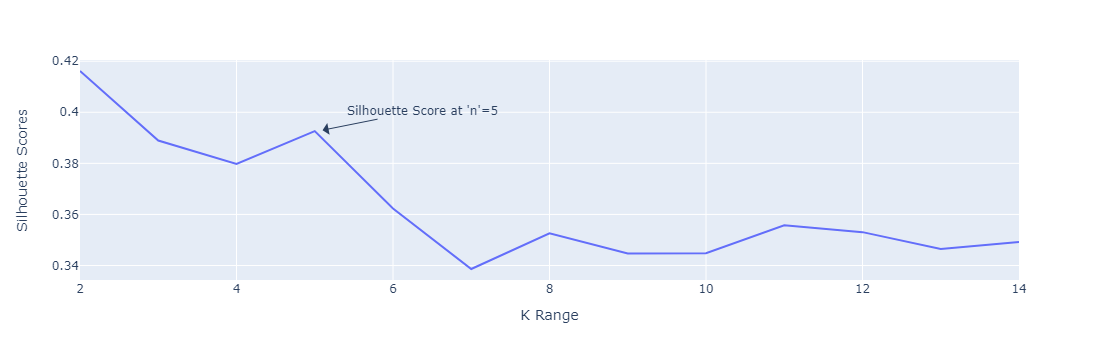

In [38]:
s_graph=px.line(x=range(2,15),y=s_score).update_layout(xaxis_title="K Range",yaxis_title="Silhouette Scores",width=700).add_annotation(x=5.1,y=0.393,showarrow=True,arrowhead=1,arrowsize=2,ax=100,ay=-20,text="Silhouette Score at 'n'=5")
s_graph.show()

 #####                     From above graph, we can see that silhouette score is highest at 2, but dividing our playlist into 2 clusters only is not ideal.
 ##### So, our ideal option for no. of clusters is indeed 5

## Generating clusters with K-Means algorithm

In [27]:
km = KMeans(n_clusters=5,n_init='auto',random_state=42)
clusters = km.fit_predict(df_2d)
print(clusters[:10])

[1 3 2 4 0 3 0 0 1 3]


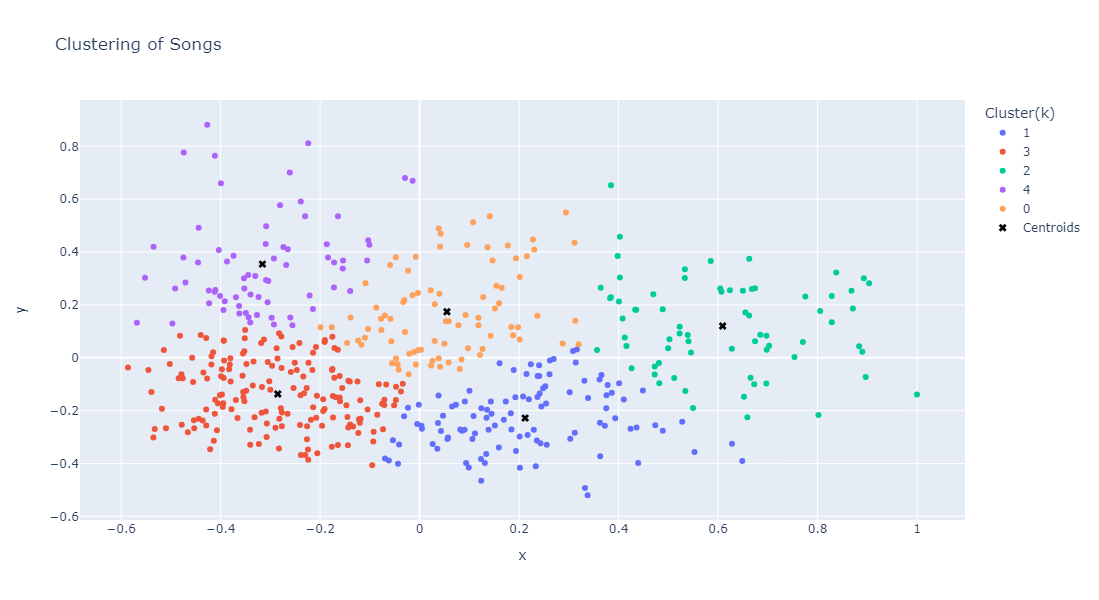

In [28]:
df_clusters = pd.DataFrame({'x': df_2d[:, 0], 'y': df_2d[:, 1], 'Cluster(k)': clusters.astype(str)})

#Plotting the df and centroids evaluated by k-means algorithm
fig_cluster=px.scatter(df_clusters,x='x',y='y',color='Cluster(k)',title = "Clustering of Songs",height=600,width=800)
fig_cluster.add_scatter(x=km.cluster_centers_[:,0],y=km.cluster_centers_[:,1],mode='markers',name='Centroids',marker=dict(color='Black',size=7,symbol='x'))
fig_cluster.show()


## Grouping tracks with their respective clusters 

In [29]:
dfGrouped = dfOriginal.copy()
# Assigning cluster value to tracks in original df 
dfGrouped['Cluster'] = clusters
# Changing tempo and loudness to their scaled counterparts for convenient plotting  
dfGrouped[['Tempo','Loudness']] = df[['Tempo_scaled','Loudness_scaled']]
dfGrouped.head()


,Name,Artist,Duration,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Cluster
0,Like a Rolling Stone,Bob Dylan,6:09,0.7310,0.482,0.721,0.000000,0.1890,0.640149,0.0321,0.220230,0.557,1
1,(I Can't Get No) Satisfaction - Mono Version /...,The Rolling Stones,3:42,0.0354,0.722,0.882,0.049600,0.1190,0.643693,0.0348,0.509240,0.921,3
2,Imagine - Remastered 2010,John Lennon,3:07,0.9070,0.547,0.257,0.183000,0.0935,0.382793,0.0252,0.082817,0.169,2
3,Purple Rain,Prince,8:40,0.0353,0.367,0.452,0.002280,0.6890,0.473071,0.0307,0.345614,0.189,4
4,What's Going On,Marvin Gaye,3:53,0.4030,0.280,0.720,0.000001,0.3940,0.508230,0.1110,0.975646,0.805,0


## Mean table of attribute values 

In [30]:
#Finding mean of all attributes of the grouped df and grouping them by Cluster
dfGrouped_mean = dfGrouped.drop(['Name','Duration','Artist'],axis=1,inplace = False).groupby('Cluster').mean()
dfGrouped_mean

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
Cluster,,,,,,,,,
0,0.273905,0.487800,0.541447,0.037384,0.271947,0.484878,0.049369,0.390359,0.479798
1,0.604453,0.623888,0.547178,0.026570,0.167400,0.501519,0.063051,0.404327,0.762065
2,0.745243,0.470729,0.302706,0.023963,0.191610,0.365859,0.040506,0.355888,0.352723
3,0.123680,0.638195,0.748249,0.054673,0.169601,0.586571,0.058970,0.409753,0.803669
4,0.055055,0.404725,0.825986,0.079189,0.447671,0.612584,0.072881,0.511335,0.468014


## Visualizing the means of attribute values in each cluster 

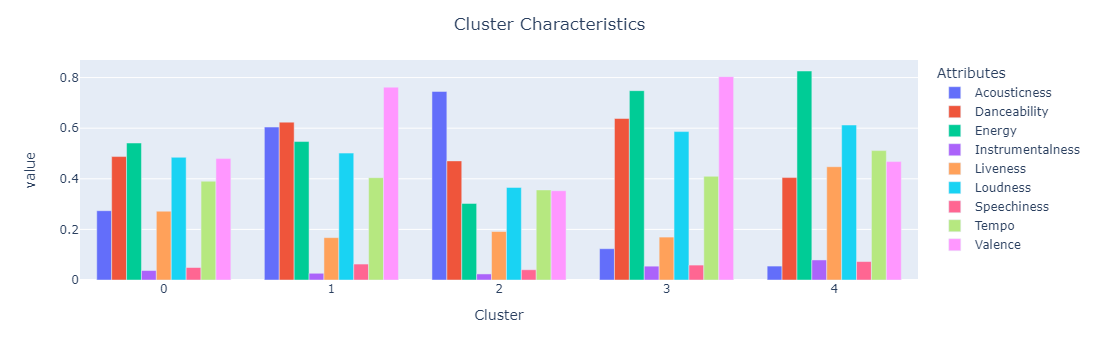

In [39]:
bar=px.bar(dfGrouped_mean[:5],barmode = 'group').update_layout(legend_title = 'Attributes',title = 'Cluster Characteristics',title_x=0.5,width=1000)
bar.show()